### 1) Partial Dependency plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.model_selection import GridSearchCV
pd.options.mode.chained_assignment = None 

In [2]:
annual_feature_outputs = pd.read_excel('annual_feature_outputs.xlsx')

In [3]:
X2 = annual_feature_outputs.drop(['response'],axis=1)
y2 = annual_feature_outputs['response']

In [4]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X2, y2, test_size=2/3, random_state=1147)
X_train_annual.shape

(2294, 77)

In [5]:
X_TrA = X_train_annual
X_TrA = X_TrA.drop(columns=['customer_id','Unnamed: 0'],axis=1)

In [6]:
X_TrA.reset_index(drop=True, inplace=True)

In [7]:
X_train_annual.reset_index(drop=True, inplace=True)

In [8]:
y_train_annual.reset_index(drop=True, inplace=True)

In [9]:
best_RF = RandomForestClassifier(n_estimators=25, max_depth=8, random_state=1147)

In [10]:
best_RF.fit(X_TrA, y_train_annual)

RandomForestClassifier(max_depth=8, n_estimators=25, random_state=1147)

### To plot the feature importance graph and extract the top 5 features

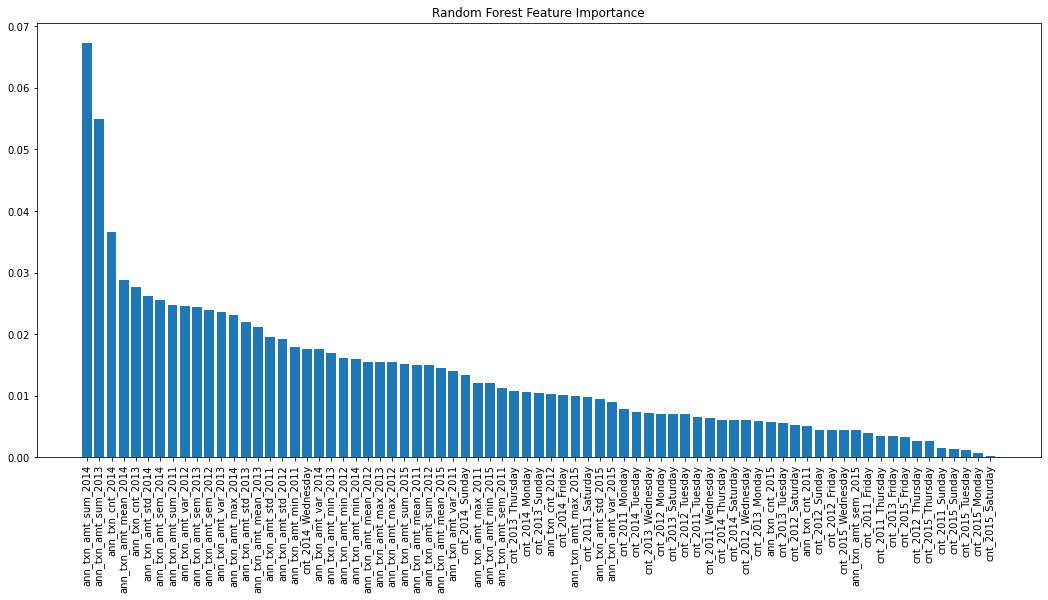

In [11]:
# Calculate feature importances
importances = best_RF.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [X_TrA.columns [i] for i in indices]

# Create plot
plt.figure(figsize=(18,8))
# Create plot title
plt.title("Random Forest Feature Importance")
# Add bars
plt.bar(range(X_TrA.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_TrA.shape[1]), names, rotation=90)
plt.show()

The top 5 features are:<br>

1) ann_txn_amt_sum_2014<br>
2) ann_txn_amt_sum_2013<br>
3) ann_txn_cnt_2014<br>
4) ann_txn_amt_mean_2014<br>
5) ann_txn_cnt_2013<br>

The top 5 features are used for Data analysis and Partial Dependency plots are shown for each feature below.

## 1) ann_txn_amt_sum_2014 (The top 1st feature)

In [12]:
X_f2 = X_train_annual[['ann_txn_amt_sum_2014']]

In [13]:
y_train_annual = pd.DataFrame(y_train_annual)

In [14]:
y_f2 = y_train_annual['response']

### Using Simple Tree model with the feature of interest, we can identify the best bin edges for the PDP plots

In [15]:
clf_dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1147, criterion='entropy')
estimator = clf_dt.fit(X_f2, y_f2)

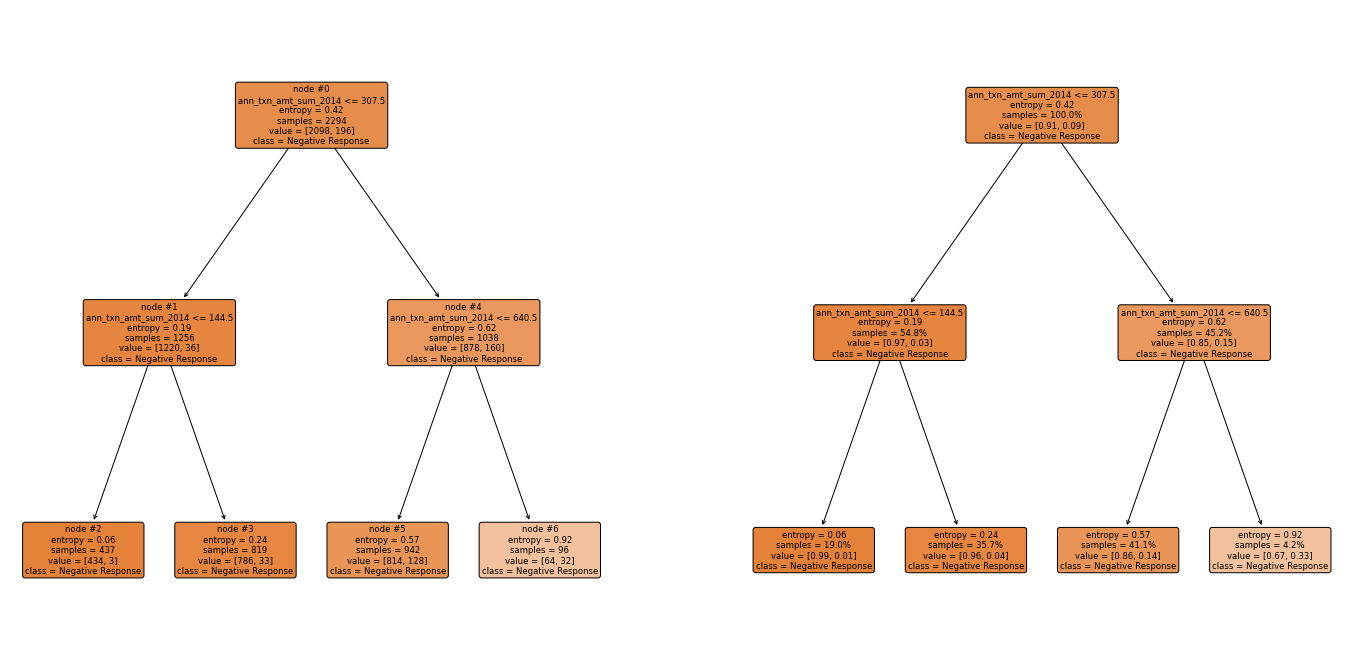

In [16]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X_f2.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X_f2.columns), class_names = ['Negative Response', 'Positive Response'], rounded = True, precision = 2, proportion=True)

plt.show()

bins = 0, 144.5, 307.5, 640.5, 640.5+

### Here, I defined two arrays "population_distribution" and "responses" and collected the data of clients for every bins

In [17]:
population_distribution_1_f2 = []
responses_1_f2 = []
population_distribution_2_f2 = []
responses_2_f2 = []
population_distribution_3_f2 = []
responses_3_f2 = []
population_distribution_4_f2 = []
responses_4_f2 = []
#cnt1 = 0
for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_sum_2014'][i] <=144.5:
        population_distribution_1_f2.append(X_train_annual['customer_id'][i])
        responses_1_f2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2014'][i] >144.5 and X_train_annual['ann_txn_amt_sum_2014'][i] <=307.5:
        population_distribution_2_f2.append(X_train_annual['customer_id'][i])
        responses_2_f2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2014'][i] >307.5 and X_train_annual['ann_txn_amt_sum_2014'][i] <=640.5:
        population_distribution_3_f2.append(X_train_annual['customer_id'][i])
        responses_3_f2.append(y_train_annual['response'][i])
    else:
        population_distribution_4_f2.append(X_train_annual['customer_id'][i])
        responses_4_f2.append(y_train_annual['response'][i])


### To calculate population distribution of the first feature

In [18]:
population_distribution_f2 = []
p1 = (len(population_distribution_1_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(p1)
p2 = (len(population_distribution_2_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(p2)
p3 = (len(population_distribution_3_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(p3)
p4 = (len(population_distribution_4_f2)/len(X_train_annual)) * 100
population_distribution_f2.append(p4)

In [19]:
population_distribution_f2

[19.049694856146466, 35.70183086312119, 41.06364428945074, 4.184829991281604]

### To calculate response rate of the first feature

**The response rate is determined by extracting all the 1's (positive response) from each bin.<br>
Formula:<br>
Number of positive responses in each bin/total number of responses in each bin.**

In [20]:
r1=[]
for i in range(len(responses_1_f2)):
    if responses_1_f2[i] == 1:
        r1.append(responses_1_f2[i])


In [21]:
r2=[]
for i in range(len(responses_2_f2)):
    if responses_2_f2[i] == 1:
        r2.append(responses_2_f2[i])

In [22]:
r3=[]
for i in range(len(responses_3_f2)):
    if responses_3_f2[i] == 1:
        r3.append(responses_3_f2[i])

In [23]:
r4=[]
for i in range(len(responses_4_f2)):
    if responses_4_f2[i] == 1:
        r4.append(responses_4_f2[i])

In [24]:
response_rate_f2 = []
r_1 = (len(r1)/len(responses_1_f2)) * 100
response_rate_f2.append(r_1)
r_2 = (len(r2)/len(responses_2_f2)) * 100
response_rate_f2.append(r_2)
r_3 = (len(r3)/len(responses_3_f2)) * 100
response_rate_f2.append(r_3)
r_4 = (len(r4)/len(responses_4_f2)) * 100
response_rate_f2.append(r_4)
response_rate_f2

[0.6864988558352403, 4.029304029304029, 13.588110403397028, 33.33333333333333]

In [25]:
langs_2 = ['0-144.5','144.5-307.5','307.5-640.5','640.5+']

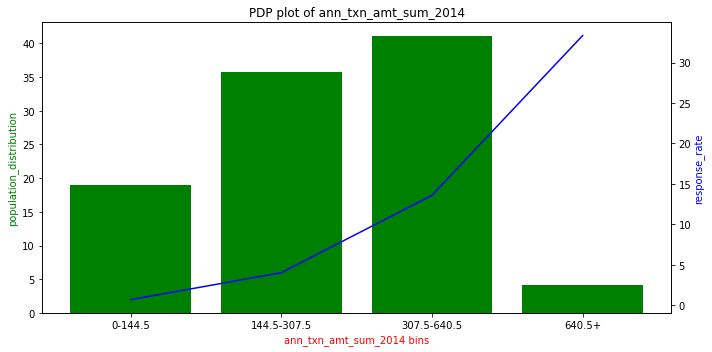

In [26]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('PDP plot of ann_txn_amt_sum_2014')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(langs_2, population_distribution_f2, color = 'g')
ax2.plot(langs_2, response_rate_f2, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('ann_txn_amt_sum_2014 bins', color = 'r')
ax.set_ylabel('population_distribution', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('response_rate', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

**Conclusion**<br>
In 2014, majority of the population (40 %) had annual transactions between 307.5-640.5 $ and their response rate was considerably high. The response rate was very less for the least annual transactions amount. Whereas, the response rate was maximum for the highest transaction of 641+ dollars and the least population distribution.

## 2) ann_txn_amt_sum_2013 (The top 2nd feature)

In [27]:
X_f3 = X_train_annual[['ann_txn_amt_sum_2013']]

In [28]:
y_f3 = y_train_annual['response']

In [29]:
clf_dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1147, criterion='entropy')
estimator = clf_dt.fit(X_f3, y_f3)

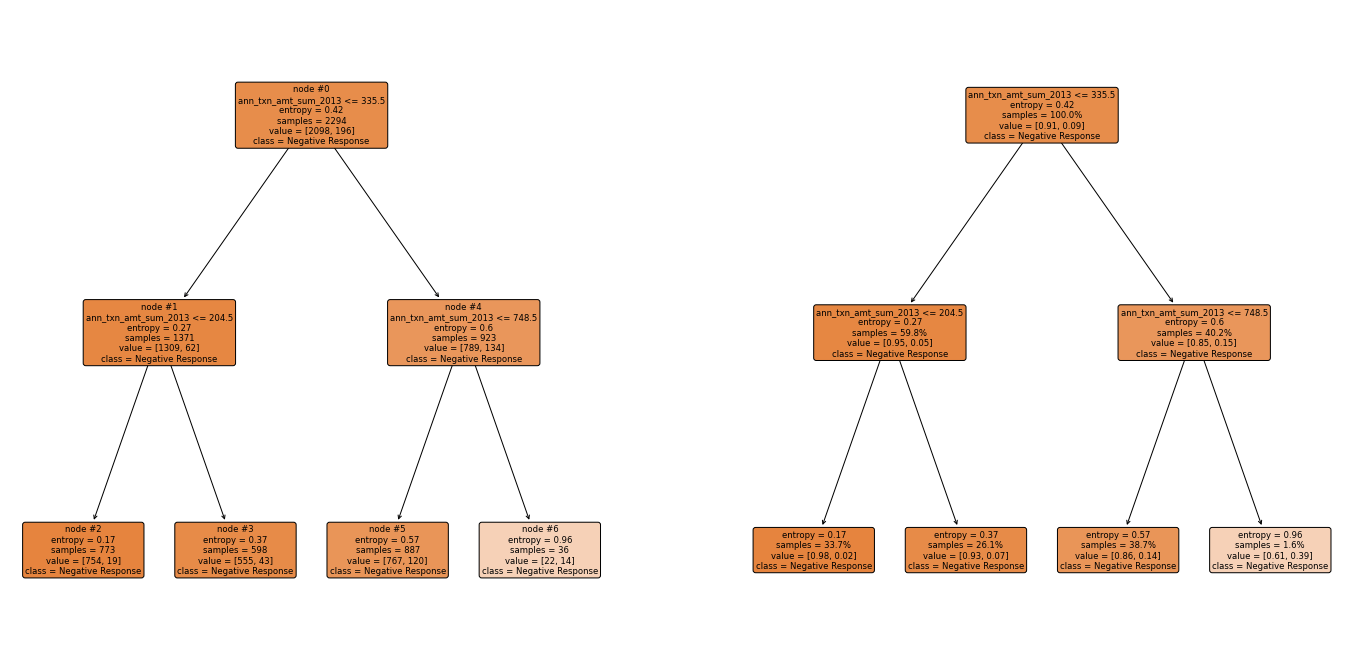

In [30]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X_f3.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X_f3.columns), class_names = ['Negative Response', 'Positive Response'], rounded = True, precision = 2, proportion=True)

plt.show()

bins = 0, 204.5, 335.5, 748.5, 748.5+

In [31]:
population_distribution_1_f3 = []
responses_1_f3 = []
population_distribution_2_f3 = []
responses_2_f3 = []
population_distribution_3_f3 = []
responses_3_f3 = []
population_distribution_4_f3 = []
responses_4_f3 = []
#cnt1 = 0
for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_sum_2013'][i] <=204.5:
        population_distribution_1_f3.append(X_train_annual['customer_id'][i])
        responses_1_f3.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2013'][i] >204.5 and X_train_annual['ann_txn_amt_sum_2013'][i] <=335.5:
        population_distribution_2_f3.append(X_train_annual['customer_id'][i])
        responses_2_f3.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_sum_2013'][i] >335.5 and X_train_annual['ann_txn_amt_sum_2013'][i] <=748.5:
        population_distribution_3_f3.append(X_train_annual['customer_id'][i])
        responses_3_f3.append(y_train_annual['response'][i])
    else:
        population_distribution_4_f3.append(X_train_annual['customer_id'][i])
        responses_4_f3.append(y_train_annual['response'][i])


### To calculate population distribution and response rate

In [32]:
population_distribution_f3 = []
p1 = (len(population_distribution_1_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(p1)
p2 = (len(population_distribution_2_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(p2)
p3 = (len(population_distribution_3_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(p3)
p4 = (len(population_distribution_4_f3)/len(X_train_annual)) * 100
population_distribution_f3.append(p4)

In [33]:
population_distribution_f3

[33.696599825632084, 26.068003487358325, 38.66608544027899, 1.5693112467306016]

In [34]:
r1=[]
for i in range(len(responses_1_f3)):
    if responses_1_f3[i] == 1:
        r1.append(responses_1_f3[i])


In [35]:
r2=[]
for i in range(len(responses_2_f3)):
    if responses_2_f3[i] == 1:
        r2.append(responses_2_f3[i])

In [36]:
r3=[]
for i in range(len(responses_3_f3)):
    if responses_3_f3[i] == 1:
        r3.append(responses_3_f3[i])

In [37]:
r4=[]
for i in range(len(responses_4_f3)):
    if responses_4_f3[i] == 1:
        r4.append(responses_4_f3[i])

In [38]:
response_rate_f3 = []
r_1 = (len(r1)/len(responses_1_f3)) * 100
response_rate_f3.append(r_1)
r_2 = (len(r2)/len(responses_2_f3)) * 100
response_rate_f3.append(r_2)
r_3 = (len(r3)/len(responses_3_f3)) * 100
response_rate_f3.append(r_3)
r_4 = (len(r4)/len(responses_4_f3)) * 100
response_rate_f3.append(r_4)
response_rate_f3

[2.457956015523933, 7.190635451505016, 13.528748590755354, 38.88888888888889]

In [39]:
langs_3 = ['0-204.5','204.5-335.5','335.5-748.5','748.5+']

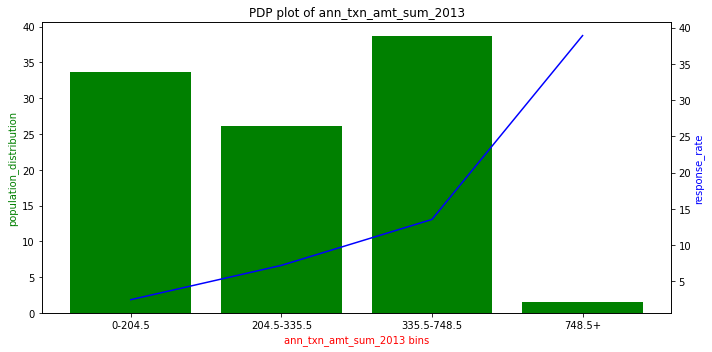

In [40]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('PDP plot of ann_txn_amt_sum_2013')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(langs_3, population_distribution_f3, color = 'g')
ax2.plot(langs_3, response_rate_f3, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('ann_txn_amt_sum_2013 bins', color = 'r')
ax.set_ylabel('population_distribution', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('response_rate', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

**Conclusion**<br>
In 2013, majority of the population around 38 % had annual transactions between 336-749 dollars and their response rate was considerably high. The response rate was the highest for the highest annual transactions data which is above 750 dollars. Only few clients gave a positive response for those who had transactions above 750 dollars. Nearly one-third of the population gave a negative response to the campaign and also had less transactions in 2014.

## 3) ann_txn_cnt_2014 (The top 3rd feature)

In [41]:
X_f1 = X_train_annual[['ann_txn_cnt_2014']]

In [42]:
y_f1 = y_train_annual['response']

In [43]:
clf_dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1148, criterion='entropy')
estimator = clf_dt.fit(X_f1, y_f1)

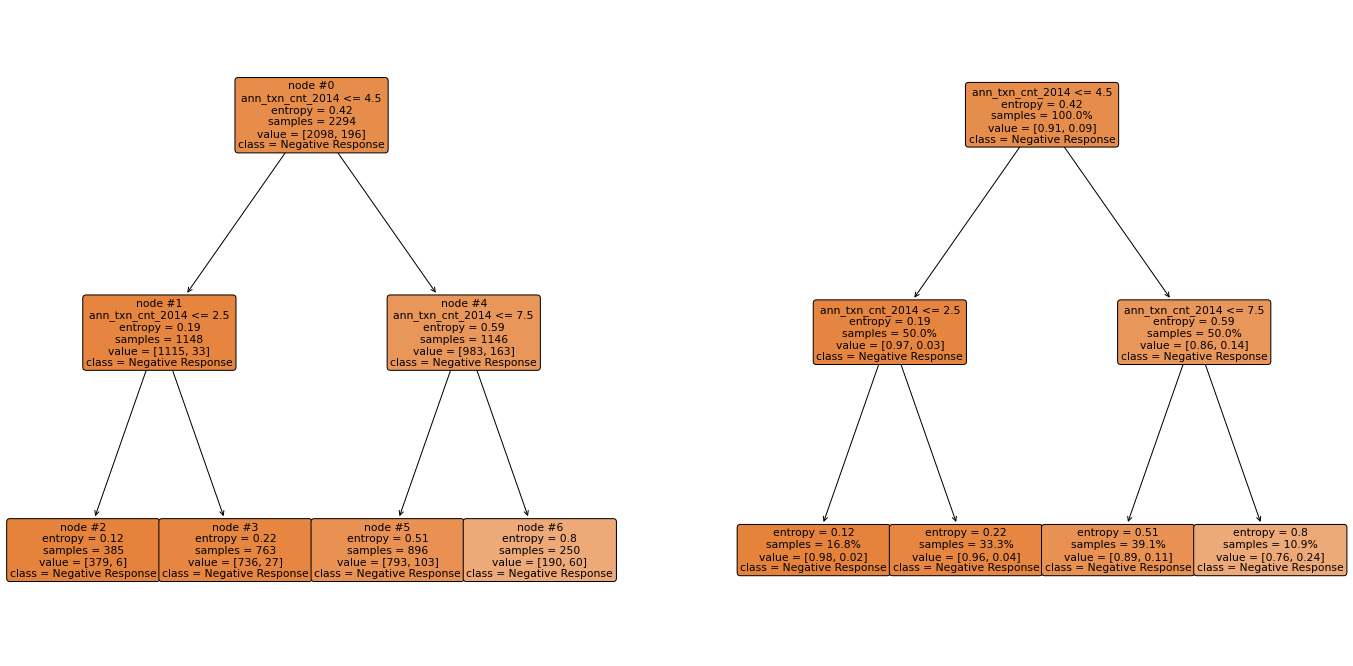

In [44]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X_f1.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X_f1.columns), class_names = ['Negative Response', 'Positive Response'], rounded = True, precision = 2, proportion=True)

plt.show()

bins = 0, 2.5, 4.5, 7.5, 7.5+

In [45]:
population_distribution_1 = []
responses_1 = []
population_distribution_2 = []
responses_2 = []
population_distribution_3 = []
responses_3 = []
population_distribution_4 = []
responses_4 = []
#cnt1 = 0
for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_cnt_2014'][i] <=2.5:
        population_distribution_1.append(X_train_annual['customer_id'][i])
        responses_1.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_cnt_2014'][i] >2.5 and X_train_annual['ann_txn_cnt_2014'][i] <=4.5:
        population_distribution_2.append(X_train_annual['customer_id'][i])
        responses_2.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_cnt_2014'][i] >4.5 and X_train_annual['ann_txn_cnt_2014'][i] <=7.5:
        population_distribution_3.append(X_train_annual['customer_id'][i])
        responses_3.append(y_train_annual['response'][i])
    else:
        population_distribution_4.append(X_train_annual['customer_id'][i])
        responses_4.append(y_train_annual['response'][i])


### To calculate population distribution and response rate

In [46]:
population_distribution = []
p1 = (len(population_distribution_1)/len(X_train_annual)) * 100
population_distribution.append(p1)
p2 = (len(population_distribution_2)/len(X_train_annual)) * 100
population_distribution.append(p2)
p3 = (len(population_distribution_3)/len(X_train_annual)) * 100
population_distribution.append(p3)
p4 = (len(population_distribution_4)/len(X_train_annual)) * 100
population_distribution.append(p4)

In [47]:
population_distribution

[16.782911944202265, 33.26068003487359, 39.05841325196164, 10.897994768962512]

In [48]:
r1=[]
for i in range(len(responses_1)):
    if responses_1[i] == 1:
        r1.append(responses_1[i])


In [49]:
r2=[]
for i in range(len(responses_2)):
    if responses_2[i] == 1:
        r2.append(responses_2[i])

In [50]:
r3=[]
for i in range(len(responses_3)):
    if responses_3[i] == 1:
        r3.append(responses_3[i])

In [51]:
r4=[]
for i in range(len(responses_4)):
    if responses_4[i] == 1:
        r4.append(responses_4[i])

In [52]:
response_rate = []
r_1 = (len(r1)/len(responses_1)) * 100
response_rate.append(r_1)
r_2 = (len(r2)/len(responses_2)) * 100
response_rate.append(r_2)
r_3 = (len(r3)/len(responses_3)) * 100
response_rate.append(r_3)
r_4 = (len(r4)/len(responses_4)) * 100
response_rate.append(r_4)
response_rate

[1.5584415584415585, 3.5386631716906947, 11.495535714285714, 24.0]

In [53]:
langs_1 = ['0-2.5','2.5-4.5','4.5-7.5','7.5+']

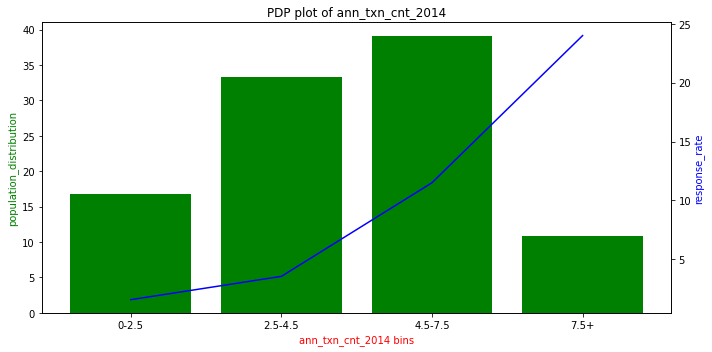

In [54]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('PDP plot of ann_txn_cnt_2014')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(langs_1, population_distribution, color = 'g')
ax2.plot(langs_1, response_rate, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('ann_txn_cnt_2014 bins', color = 'r')
ax.set_ylabel('population_distribution', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('response_rate', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

**Conclusion**<br>
Here we are mainly concerned with the number of transactions made by the clients and how it relates to the campaign response. The response rate was the highest for clients (only 10%) who had 8 transactions or more which means these customers were satisfied with the product. Similarly, the response rate was less for clients who purchased less or no products.

## 4) ann_txn_amt_mean_2014 (The top 4th feature)

In [55]:
X_f4 = X_train_annual[['ann_txn_amt_mean_2014']]

In [56]:
y_f4 = y_train_annual['response']

In [57]:
clf_dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1147, criterion='entropy')
estimator = clf_dt.fit(X_f4, y_f4)

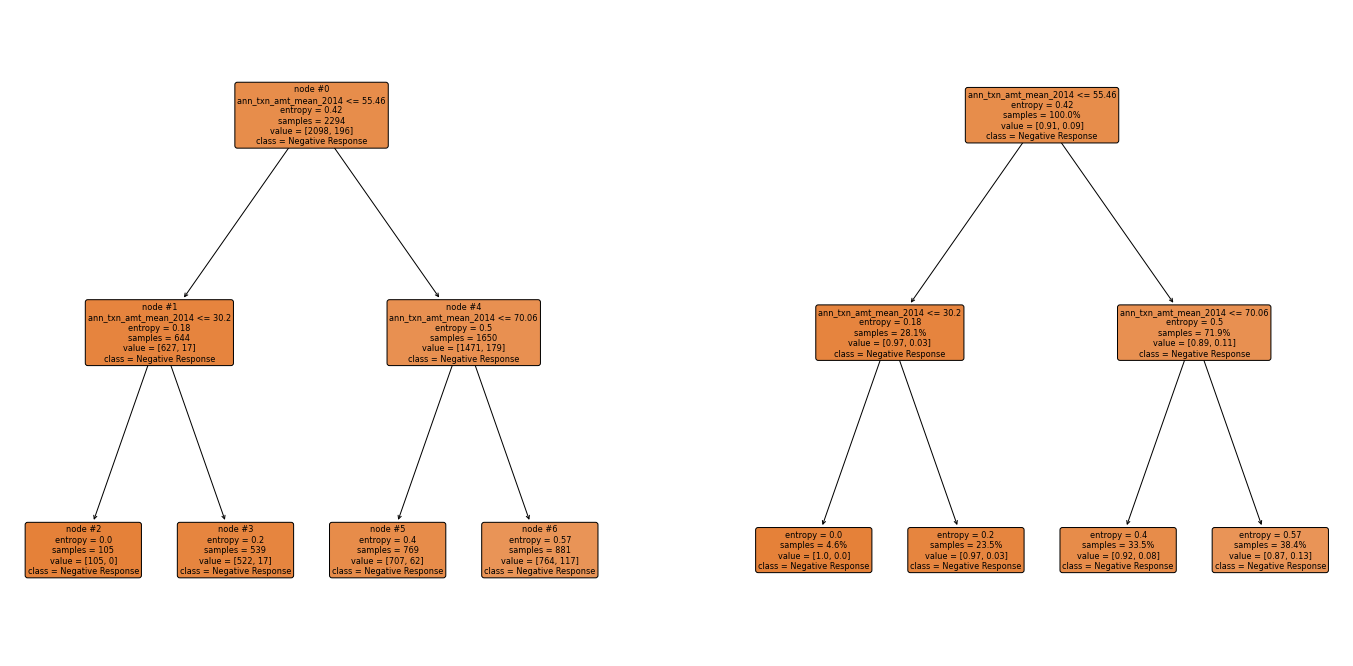

In [58]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X_f4.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X_f4.columns), class_names = ['Negative Response', 'Positive Response'], rounded = True, precision = 2, proportion=True)

plt.show()

bins = 0, 30.2, 55.46, 70.06, 70.06+

In [59]:
population_distribution_1_f4 = []
responses_1_f4 = []
population_distribution_2_f4 = []
responses_2_f4 = []
population_distribution_3_f4 = []
responses_3_f4 = []
population_distribution_4_f4 = []
responses_4_f4 = []
#cnt1 = 0
for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_amt_mean_2014'][i] <=30.2:
        population_distribution_1_f4.append(X_train_annual['customer_id'][i])
        responses_1_f4.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_mean_2014'][i] >30.2 and X_train_annual['ann_txn_amt_mean_2014'][i] <=55.46:
        population_distribution_2_f4.append(X_train_annual['customer_id'][i])
        responses_2_f4.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_amt_mean_2014'][i] >55.46 and X_train_annual['ann_txn_amt_mean_2014'][i] <=70.06:
        population_distribution_3_f4.append(X_train_annual['customer_id'][i])
        responses_3_f4.append(y_train_annual['response'][i])
    else:
        population_distribution_4_f4.append(X_train_annual['customer_id'][i])
        responses_4_f4.append(y_train_annual['response'][i])


### To calculate population distribution and response rate

In [60]:
population_distribution_f4 = []
p1 = (len(population_distribution_1_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(p1)
p2 = (len(population_distribution_2_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(p2)
p3 = (len(population_distribution_3_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(p3)
p4 = (len(population_distribution_4_f4)/len(X_train_annual)) * 100
population_distribution_f4.append(p4)

In [61]:
population_distribution_f4

[4.577157802964255, 23.496076721883174, 33.52223190932868, 38.40453356582389]

In [62]:
r1=[]
for i in range(len(responses_1_f4)):
    if responses_1_f4[i] == 1:
        r1.append(responses_1_f4[i])


In [63]:
r2=[]
for i in range(len(responses_2_f4)):
    if responses_2_f4[i] == 1:
        r2.append(responses_2_f4[i])

In [64]:
r3=[]
for i in range(len(responses_3_f4)):
    if responses_3_f4[i] == 1:
        r3.append(responses_3_f4[i])

In [65]:
r4=[]
for i in range(len(responses_4_f4)):
    if responses_4_f4[i] == 1:
        r4.append(responses_4_f4[i])

In [66]:
response_rate_f4 = []
r_1 = (len(r1)/len(responses_1_f4)) * 100
response_rate_f4.append(r_1)
r_2 = (len(r2)/len(responses_2_f4)) * 100
response_rate_f4.append(r_2)
r_3 = (len(r3)/len(responses_3_f4)) * 100
response_rate_f4.append(r_3)
r_4 = (len(r4)/len(responses_4_f4)) * 100
response_rate_f4.append(r_4)
response_rate_f4

[0.0, 3.153988868274583, 8.062418725617686, 13.280363223609534]

In [67]:
langs_4 = ['0-30.02','30.02-55.46','55.46-70.06','70.06+']

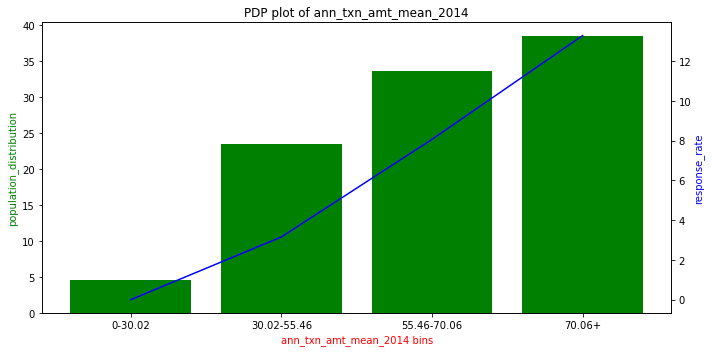

In [68]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('PDP plot of ann_txn_amt_mean_2014')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(langs_4, population_distribution_f4, color = 'g')
ax2.plot(langs_4, response_rate_f4, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('ann_txn_amt_mean_2014 bins', color = 'r')
ax.set_ylabel('population_distribution', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('response_rate', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

**Conclusion**<br>
This graph tells about the average transactions made by the clients in the year 2014. The response rate was maximum for an average transaction of 70 or plus dollars which constituted 40% of the population. More than half of the population had mean transactions between 30 to 70 dollars. The response rate was least for least population distribution and average transactions within 30 dollars. 

## 5) ann_txn_cnt_2013 (The top 5th feature)

In [69]:
X_f5 = X_train_annual[['ann_txn_cnt_2013']]

In [70]:
y_f5 = y_train_annual['response']

In [71]:
clf_dt = DecisionTreeClassifier(max_depth = 2, min_samples_split = 2, random_state=1148, criterion='entropy')
estimator = clf_dt.fit(X_f5, y_f5)

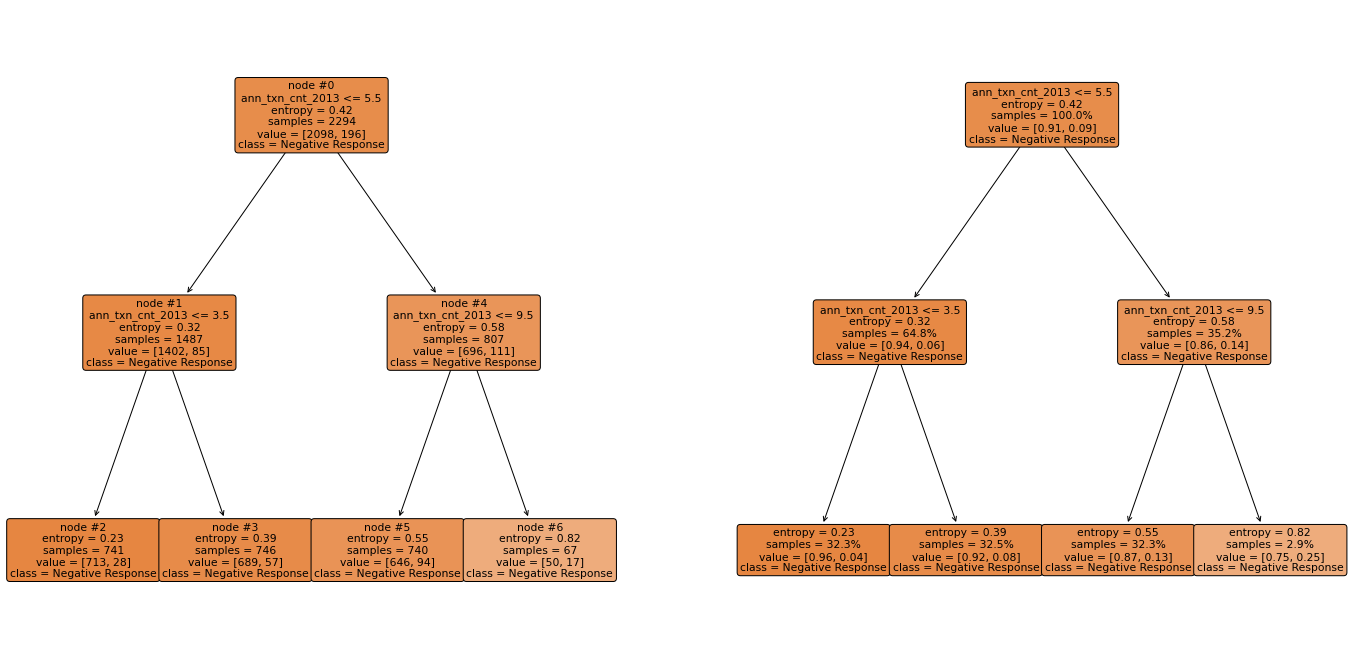

In [72]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
axs1 = plot_tree(estimator, filled=True, feature_names = list(X_f5.columns), class_names=['Negative Response', 'Positive Response'],rounded = True, precision = 2, node_ids=True)

fig_1_b = plt.subplot(122)
axs2 = plot_tree(estimator, filled=True, feature_names = list(X_f5.columns), class_names = ['Negative Response', 'Positive Response'], rounded = True, precision = 2, proportion=True)

plt.show()

bins = 0, 3.5, 5.5, 9.5, 9.5+

In [73]:
population_distribution_1_f5 = []
responses_1_f5 = []
population_distribution_2_f5 = []
responses_2_f5 = []
population_distribution_3_f5 = []
responses_3_f5 = []
population_distribution_4_f5 = []
responses_4_f5 = []
#cnt1 = 0
for i in range(len(X_train_annual)):
    if X_train_annual['ann_txn_cnt_2013'][i] <=3.5:
        population_distribution_1_f5.append(X_train_annual['customer_id'][i])
        responses_1_f5.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_cnt_2013'][i] >3.5 and X_train_annual['ann_txn_cnt_2013'][i] <=5.5:
        population_distribution_2_f5.append(X_train_annual['customer_id'][i])
        responses_2_f5.append(y_train_annual['response'][i])
    elif X_train_annual['ann_txn_cnt_2013'][i] >5.5 and X_train_annual['ann_txn_cnt_2013'][i] <=9.5:
        population_distribution_3_f5.append(X_train_annual['customer_id'][i])
        responses_3_f5.append(y_train_annual['response'][i])
    else:
        population_distribution_4_f5.append(X_train_annual['customer_id'][i])
        responses_4_f5.append(y_train_annual['response'][i])


### To calculate population distribution and response rate

In [74]:
population_distribution_f5 = []
p1 = (len(population_distribution_1_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(p1)
p2 = (len(population_distribution_2_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(p2)
p3 = (len(population_distribution_3_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(p3)
p4 = (len(population_distribution_4_f5)/len(X_train_annual)) * 100
population_distribution_f5.append(p4)

In [75]:
population_distribution_f5

[32.30165649520488, 32.51961639058413, 32.25806451612903, 2.920662598081953]

In [76]:
r1=[]
for i in range(len(responses_1_f5)):
    if responses_1_f5[i] == 1:
        r1.append(responses_1_f5[i])


In [77]:
r2=[]
for i in range(len(responses_2_f5)):
    if responses_2_f5[i] == 1:
        r2.append(responses_2_f5[i])

In [78]:
r3=[]
for i in range(len(responses_3_f5)):
    if responses_3_f5[i] == 1:
        r3.append(responses_3_f5[i])

In [79]:
r4=[]
for i in range(len(responses_4_f5)):
    if responses_4_f5[i] == 1:
        r4.append(responses_4_f5[i])

In [80]:
response_rate_f5 = []
r_1 = (len(r1)/len(responses_1_f5)) * 100
response_rate_f5.append(r_1)
r_2 = (len(r2)/len(responses_2_f5)) * 100
response_rate_f5.append(r_2)
r_3 = (len(r3)/len(responses_3_f5)) * 100
response_rate_f5.append(r_3)
r_4 = (len(r4)/len(responses_4_f5)) * 100
response_rate_f5.append(r_4)
response_rate_f5

[3.7786774628879893, 7.640750670241286, 12.702702702702704, 25.37313432835821]

In [81]:
langs_5 = ['0-3.5','3.5-5.5','5.5-9.5','9.5+']

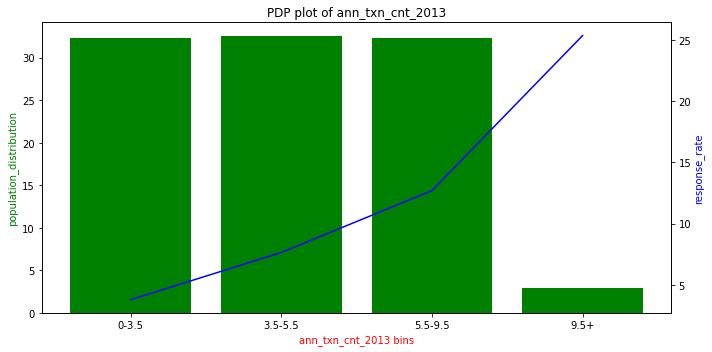

In [82]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('PDP plot of ann_txn_cnt_2013')
 
# using the twinx() for creating another
# axes object for secondary y-Axis
ax2 = ax.twinx()
ax.bar(langs_5, population_distribution_f5, color = 'g')
ax2.plot(langs_5, response_rate_f5, color = 'b')
 
# giving labels to the axises
ax.set_xlabel('ann_txn_cnt_2013 bins', color = 'r')
ax.set_ylabel('population_distribution', color = 'g')
 
# secondary y-axis label
ax2.set_ylabel('response_rate', color = 'b')
 
# defining display layout
plt.tight_layout()
 
# show plot
plt.show()

**Conclusion**<br>
In 2013, more than 90% of the population purchased products atleast 4 times. Nearly one third of the population gave the least response with annual transactions less than four. Only 3% of the total population gave a positve response and they purchased more than 10 times in 2013.

# Other interesting 2D plots (BONUS)

In [83]:
correlation_1 = X_TrA[['ann_txn_amt_sum_2014','ann_txn_amt_sum_2013','ann_txn_cnt_2014','ann_txn_amt_mean_2014','ann_txn_cnt_2013']].corr() 

<AxesSubplot:>

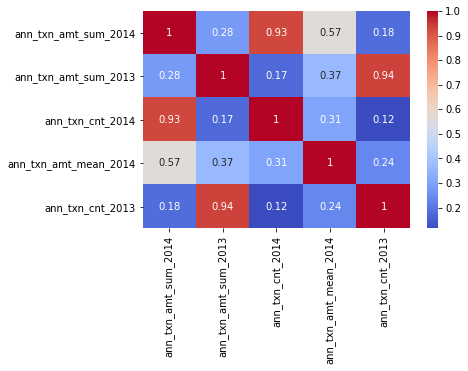

In [84]:
import seaborn as sns
sns.heatmap(correlation_1, annot = True, fmt='.2g',cmap= 'coolwarm')

1) A large positive value (near to 1.0) indicates a strong positive correlation, i.e., if the value of one of the variables increases, the value of the other variable increases as well<br>
2) A value near to 0 (both positive or negative) indicates the absence of any correlation between the two variables, and hence those variables are independent of each other.<br>
3) Each cell in the above matrix is represented by shades of a color. Here darker shades of the color indicate higher correlation while lighter shades correspond to least correlation.<br>
4) The pairs of highly correlated variables are:<br>
    a) ann_txn_amt_sum_2014 & ann_txn_cnt_2014<br>
    b) ann_txn_amt_sum_2013 & ann_txn_cnt_2013

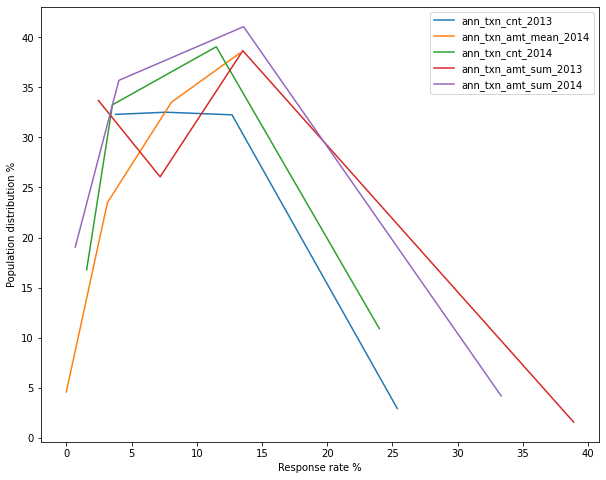

In [85]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
l1 = plt.plot(response_rate_f5, population_distribution_f5, label = "ann_txn_cnt_2013")
l2 = plt.plot(response_rate_f4, population_distribution_f4, label = "ann_txn_amt_mean_2014")
l3 = plt.plot(response_rate, population_distribution, label = "ann_txn_cnt_2014")
l4 = plt.plot(response_rate_f3, population_distribution_f3, label = "ann_txn_amt_sum_2013")
l5 = plt.plot(response_rate_f2, population_distribution_f2, label = "ann_txn_amt_sum_2014")
plt.xlabel('Response rate %')
plt.ylabel('Population distribution %')
plt.legend(['ann_txn_cnt_2013', 'ann_txn_amt_mean_2014', 'ann_txn_cnt_2014','ann_txn_amt_sum_2013','ann_txn_amt_sum_2014'])

This graph cummulatively sums up the entire discussion and makes the interpretations clear.<br>
1) For every top 5 features of interest, ony 5% of the population gave a positive response to the promotional campaign. 
2) The total sum of transactions made in the year 2013 and 2014 had similar trends of data.
3) Similarly, the number of transactions made by the clients in 2013 and 2014 were also comparable.